## Árboles de Decisión

In [2]:
# Librerias
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Datos
df      = pd.read_csv("juego_tenis.csv")
df2     = df[['Ambiente','Temp','Humedad','Viento']]
y       = np.array(df['Clase'])
one_hot = pd.get_dummies(df2)
X       = np.array(one_hot)

In [7]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [8]:
# Modelo
modelo = tree.DecisionTreeClassifier(criterion="entropy")
modelo.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [10]:
one_hot.columns

Index(['Ambiente_lluvioso', 'Ambiente_nublado', 'Ambiente_soleado',
       'Temp_alta', 'Temp_baja', 'Temp_media', 'Humedad_alta',
       'Humedad_normal', 'Viento_no', 'Viento_si'],
      dtype='object')

In [11]:
print(tree.export_text(modelo, feature_names=['Ambiente_lluvioso', 'Ambiente_nublado', 'Ambiente_soleado',
       'Temp_alta', 'Temp_baja', 'Temp_media', 'Humedad_alta',
       'Humedad_normal', 'Viento_no', 'Viento_si']))

|--- Ambiente_nublado <= 0.50
|   |--- Humedad_alta <= 0.50
|   |   |--- Viento_no <= 0.50
|   |   |   |--- Temp_baja <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Temp_baja >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Viento_no >  0.50
|   |   |   |--- class: 1
|   |--- Humedad_alta >  0.50
|   |   |--- Ambiente_lluvioso <= 0.50
|   |   |   |--- class: 0
|   |   |--- Ambiente_lluvioso >  0.50
|   |   |   |--- Viento_si <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Viento_si >  0.50
|   |   |   |   |--- class: 0
|--- Ambiente_nublado >  0.50
|   |--- class: 1



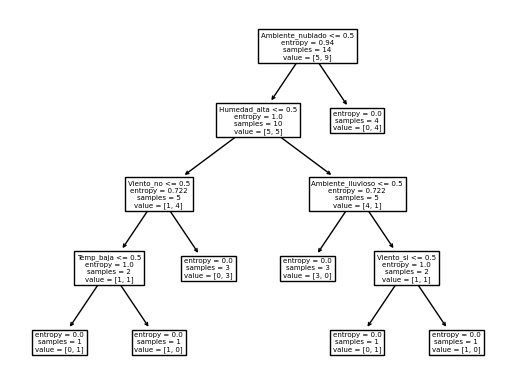

In [14]:
tree.plot_tree(modelo, feature_names=['Ambiente_lluvioso', 'Ambiente_nublado', 'Ambiente_soleado',
       'Temp_alta', 'Temp_baja', 'Temp_media', 'Humedad_alta',
       'Humedad_normal', 'Viento_no', 'Viento_si'])
plt.show()

In [15]:
modelo.predict(X)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [16]:
X[0]

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=uint8)

In [17]:
one_hot.columns

Index(['Ambiente_lluvioso', 'Ambiente_nublado', 'Ambiente_soleado',
       'Temp_alta', 'Temp_baja', 'Temp_media', 'Humedad_alta',
       'Humedad_normal', 'Viento_no', 'Viento_si'],
      dtype='object')

In [19]:
modelo.predict([[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]])

array([1])

In [20]:
tree.export_graphviz(modelo, out_file="arbolTenis.txt")